<a href="https://colab.research.google.com/github/aasmik/Identifying-Diseases-from-Medication-History/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA COLLECTION AND PREPROCESSING
import pandas as pd
import numpy as np
#LOAD THE EXCEL FILE INTO DATA FRAME
file_path = 'MEDICAL_DATASET.xlsx'
df = pd.read_excel(file_path)
#DISPLAY DATASET STRUCTURE INCLUDING NO OF NON NULL VALUES AND DATA TYPES FOR EACH COL
print("Initial Dataset Info:")
print(df.info())
#DISPLAYS 1ST 5 ROWS TO GET THE PREVIEW OF THE DATA
print("\nFirst few rows:")
print(df.head())
#REMOVES ANY ROWS WITH MISSING VALUES USING dropna()
df_cleaned = df.dropna()
#TO REMOVE DUPLICATE ROWS TO AVOID DATA REDUNDANCY
df_cleaned = df_cleaned.drop_duplicates()
#STANDARDIZES COL NAMES BY STRIPPING THE EXTRA SPACES,CONVERTING TO LOWERCASE,REPLACING SPACES WITH UNDERSCORE
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')
#SAVES THE CLEANED DATASET AS A CSV FILE WITHOUT ROW INDICES
df_cleaned.to_csv('MEDICINE_DATASET.csv', index=False)
# SAVE THE DATASET
print("\nMEDICINE_DATASET as 'MEDICINE_DATASET.csv'")
#MODEL DEVELOPMENT
#IMPORTS REQUIRED MODULES FROM SCIKIT-LEARN
#TRAIN_TEST_SPLIT: SPLITS DATA INTO TRAINING AND TESTING SETS
#LABELENCODER: CONVERTS CATEGORICAL TEXT INTO NUMBERS
#RANDOMFORESTCLASSIFIER, DECISIONTREECLASSIFIER, SVC: MACHINE LEARNING MODELS
#CLASSIFICATION_REPORT, ACCURACY_SCORE: TO EVALUATE MODEL PERFORMANCE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
#READ THE CLEANED DATASET
df = pd.read_csv('MEDICINE_DATASET.csv')
#ENCODES ALL CATEGORICAL(TEXT) COL INTO NUMERIC FORMAT
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
#SPLIT THE DATA INTO X AND Y
X = df.drop('indication', axis=1)
y = df['indication']
#  APPLY SMOTE TO BALANCE THE DATA
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# CONFIRM SMOTE WORKED PROPERLY
print("AFTER RESAMPLING (CLASS COUNTS):")
print(pd.Series(y_resampled).value_counts())
# SPLIT DATA INTO TRAINING AND TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# TRAIN A RANDOM FOREST MODEL
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
# EVALUATE RANDOM FOREST
print("\nRANDOM FOREST REPORT:\n")
print(classification_report(y_test, rf_preds, zero_division=0))
print("ACCURACY SCORE:", accuracy_score(y_test, rf_preds))




Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          100 non-null    object
 1   Category      100 non-null    object
 2   Dosage Form   100 non-null    object
 3   Strength      100 non-null    object
 4   Manufacturer  100 non-null    object
 5   Indication    100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None

First few rows:
           Name      Category Dosage Form Strength           Manufacturer  \
0      Metophen    Antifungal      Tablet   346 mg      Merck & Co., Inc.   
1     Cefcillin  Antidiabetic    Ointment   517 mg       Roche Holding AG   
2    Ibuprophen    Antifungal    Ointment   967 mg            AbbVie Inc.   
3  Ibupronazole    Antiseptic       Cream   747 mg  Eli Lilly and Company   
4   Amoxicillin     Analgesic       Cream   594 mg             Amgen Inc.   

   Indication 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          100 non-null    object
 1   category      100 non-null    object
 2   dosage_form   100 non-null    object
 3   strength      100 non-null    object
 4   manufacturer  100 non-null    object
 5   indication    100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


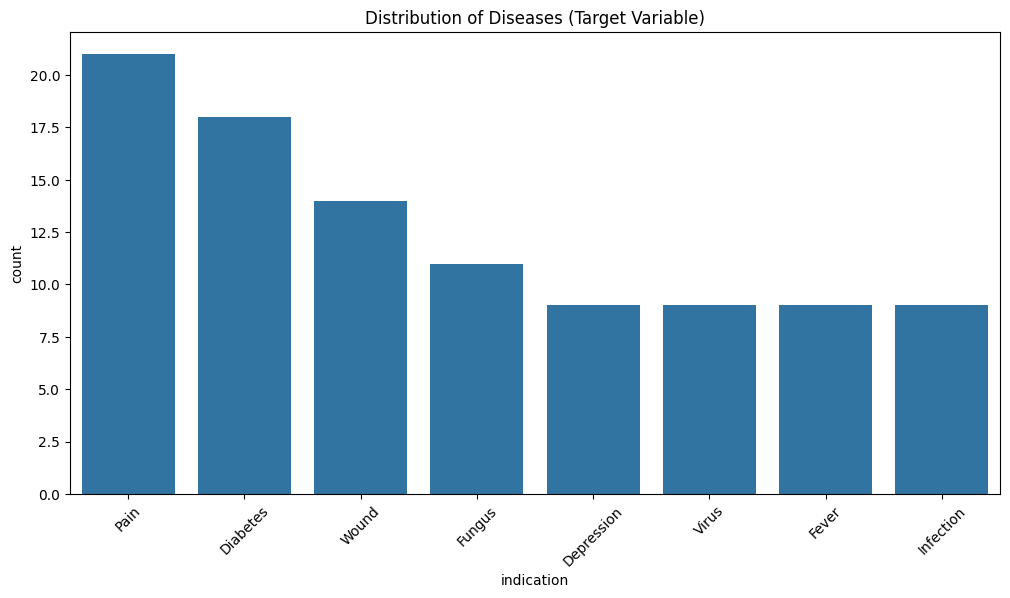

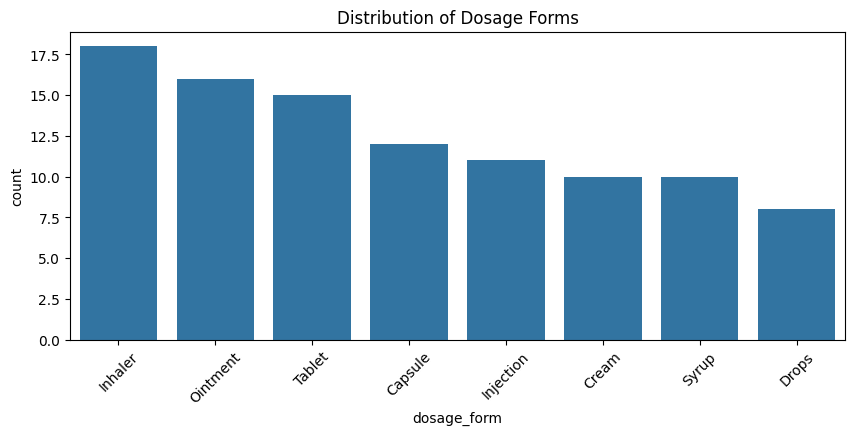

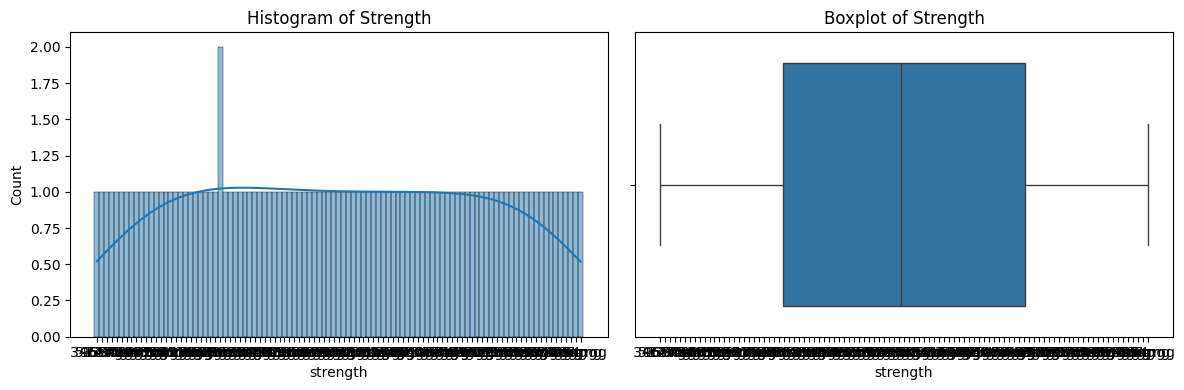

<ipython-input-9-a32620479d47>:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='indication', y='strength', ci=None)


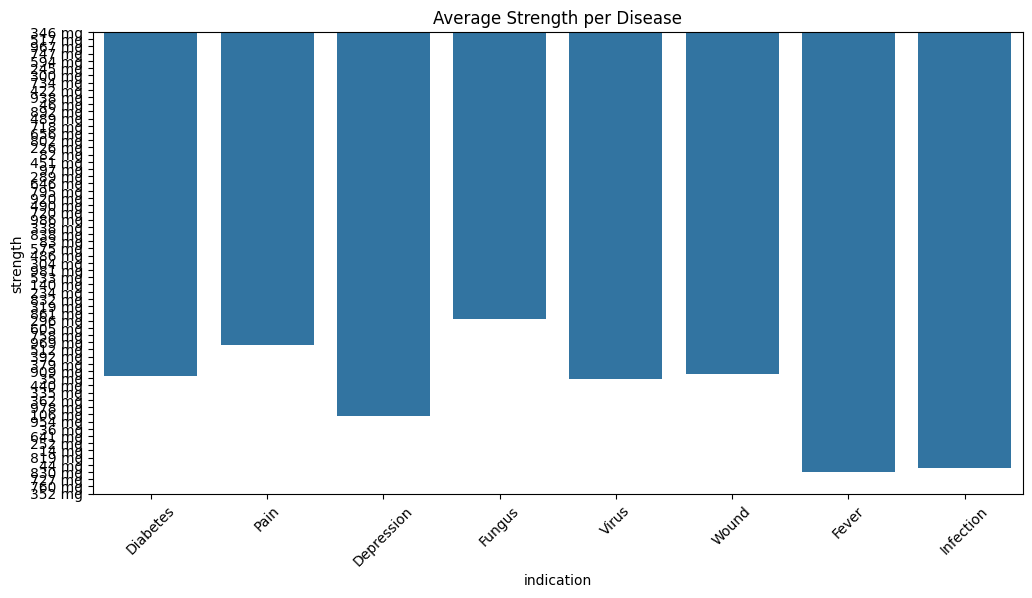

In [9]:
#Exploratory Data Analysis
#Load the Data
import pandas as pd
df = pd.read_csv("MEDICINE_DATASET.csv")
#Initial Inspection
df.head()        # First few rows
df.shape         # Number of rows and columns
df.info()        # Data types and non-null values
df.describe()    # Summary statistics for numerical columns
#Check for missing values
df.isnull().sum()
#Check for duplicates
df.duplicated().sum()
#Univariate analysis
#categorical variables
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Indication (target variable)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='indication', order=df['indication'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Diseases (Target Variable)')
plt.show()

# Countplot for Dosage Form
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='dosage_form', order=df['dosage_form'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Dosage Forms')
plt.show()

#Numerical variables
# Histogram and boxplot for Strength
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['strength'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Strength')
sns.boxplot(x=df['strength'], ax=axes[1])
axes[1].set_title('Boxplot of Strength')
plt.tight_layout()
plt.show()

#Bivariate analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='indication', y='strength', ci=None)
plt.xticks(rotation=45)
plt.title('Average Strength per Disease')
plt.show()



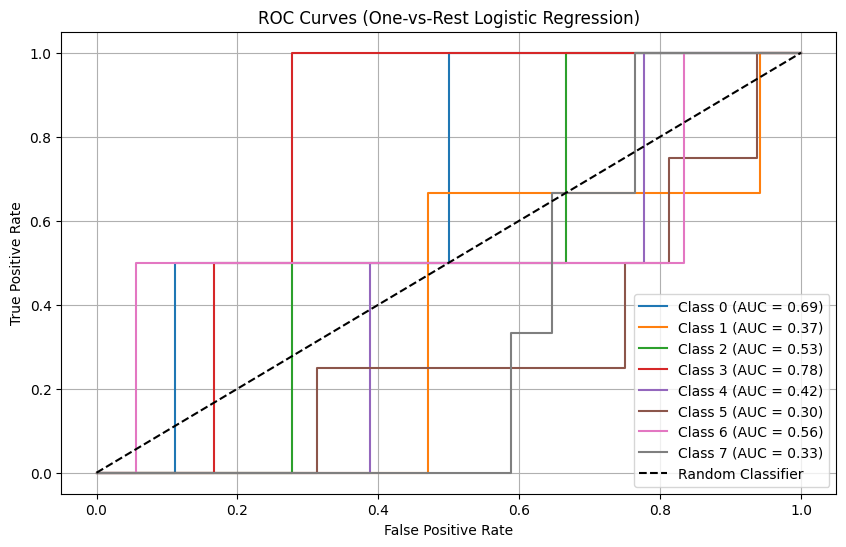

In [ ]:
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Only use classes present in y
unique_classes = sorted(y.unique())
y_bin = label_binarize(y, classes=unique_classes)
n_classes = y_bin.shape[1]

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(
    X_scaled, y_bin, test_size=0.2, random_state=42, stratify=y)

# Train One-vs-Rest classifier
clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf.fit(X_train, y_train_bin)
y_score = clf.decision_function(X_test)

# Plot ROC for each class (skip classes not in y_test)
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    if np.sum(y_test_bin[:, i]) == 0:
        print(f"Skipping class '{unique_classes[i]}' — not present in test set.")
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {unique_classes[i]} (AUC = {roc_auc:.2f})')

# Plot reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Final plot setup
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest Logistic Regression)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
